## <center>**Generating Random Variables**</center>


Consider how to take the transformation of a random variable _X_ with cumulative distribution function $F*X(x)$. Let $Y = t(X)$, that is, _Y_ is the transformation of _X_ via function $t(.)$.
In order to get the CDF of _Y_ we use the definition of CDFs:

$$
F_Y(y) = P(Y\le y) = P(t(X)\le y)
$$

We have $F_X(x)$ and want to know how to compute $F_Y(y)$ in terms of $F_X(x)$. To get where we can take the inverse of $t(x)$ on both sides of the inequiality.

$$
F_Y(y) = P(Y\le y) = P(t(X)\le y) = P(t(X) \le t^{-1}(y))
$$

This is the CDF of X:

$$
P(X \le t^{-1}(y)) = F_X(t^{-1}(y))
$$

and thats how we get $F_Y(y)$ in terms of $F_X(x)$. We can compute the density function $f_Y(y)$ by differentiating $F_Y(y)$, applying the chain rule:

$$
f_Y(y) = f_y(t^{-1}(y)) \times \frac{d}{dy} t^{-1}(y) dy
$$

Note that it's only this simple if $t(x)$ is one-to-one and strictly monotone increasing; it gets more complicated to reason about the regions where $Y$ is defined otherwise.

Let $U \sim U(0, 1)$. Then $F(X) = U$ means that the random variable $F^{-1}(U)$ has the same distribution as $X$.

---
---

### <center>**Inverse Transform Sampling**</center>


It is a basic method for pseudo-random number sampling, i.e. for generating sample numbers at random from any probability distribution given its cumulative distribution function. The basic principle is to find the inverse function of $F$, $F^{-1}$ such that $F F^{-1} = F^{-1} F = I$.

The problem that the inverse transform sampling method solves is as follows:

- Let $X$ be a random variable whose distribution can be described by the cumulative distribtuion function $F_X$.
- We want to generate values of $X$ which are distributed according to this distribution.

The inverse transform sampling method works as follows:

- Generate a random number $u$ from the standard uniform distribution in the interval $[0, 1]$, e.g. $U \sim Unif [0, 1]$.
- Find the inverse of the desired CDF, e.g. $F^{-1}_X(x)$. Inverse cumulative distribution function is also called a quantile function.
- Compute $x = F^{-1}_X(u)$ (Solve equation $F_X(x) = u$ for $X$). The computed random variable $X$ has distribution $F_X(x)$.

Expressed differently, given a continuous uniform variable $U$ in $[0, 1]$ and an invertible cumulative distribution function $F_X$, the random variable $X = F^{-1}_X(U)$ has distribution $F_X$ (or, $X$ is distributed $F_X$).

$$
\begin{split}
F_{X}(x) = P(X \leq x) &= P(F_{X}^{-1}(U)\leq x)\\
&=P(U \leq F_{X}(x))\\
&= F_{U}(F_{X}(x))\\
&= F_{X}(x)
\end{split}
$$

---
---

Remember that the cumulative distribution function of continuous uniform distribution on the interval $[0, 1]$ is $F_{U}(u) = u$.

Computationally, this method involves computing the quantile function of the distribution -- in other words, computing the CDF of the distribution (which maps a number in the domain to a probability between 0 and 1) and then inverting that function many times. This is the source of the term "inverse"/"inversion" in most of the names for this method. Note that for a discrete distribution, computing the CDF isnt in general too difficult. We simply add up the individual probabilities for the various points of the distribution.
For a continuous distribution, however, we need to integrate the probability density function (PDF) of the distribution, which is _impossible_ to do analytically for the distributions (including the normal distribution). As a result, this method may be computationally inefficient for many distributions and other methods are preferred; however, it is a useful method for building more generally applicable samplers such as those based on rejection sampling.

For the normal distribution, the lack of an analytical expression for the corresponding quantile function means that other methods (e.g. the Box-Muller transform) may be preferred computationally. It is often the case that, even for simple distributions, the inverse transform sampling method can be improved on.

(Note: technically this only works when the CDF has a closed form inverse function)

[//]: ![](./../../../Desktop/Diff_Distributions_CDF_Inverses.png)

![](https://github.com/mmuratarat/mmuratarat.github.io/blob/master/_posts/images/Screen%20Shot%202019-10-06%20at%2019.45.52.png?raw=true)

---
---



### <center>*Continuous Example: Exponential Distribution*</center>

The exponential distribution has CDF:

$$
F_{X}(x) = 1 - e^{- \lambda x}
$$

for $x \geq 0$ (and $0$ otherwise). By solving $u=F(X)$ we obtain the inverse function

$$
\begin{split}
1 - e^{-\lambda x} &= u\\
x &= \frac{-1}{\lambda}ln(1 - y)
\end{split}
$$

so

$$
F^{-1}_X(x) = \frac{-1}{\lambda}ln(1 - u)
$$

It means that if we draw some $u$ from $U \sim Unif(0, 1)$ and compute $x = F^{-1}_X(x) = \frac{-1}{\lambda}ln(1 - u)$, this $X$ has exponential distribution.
Note: In practice, since both $u$ AND $1-u$ are uniformly distributed random numbers, the calculation can be simplified as:

$$
x = F^{-1}_X(x) = \frac{-1}{\lambda}ln(u)
$$


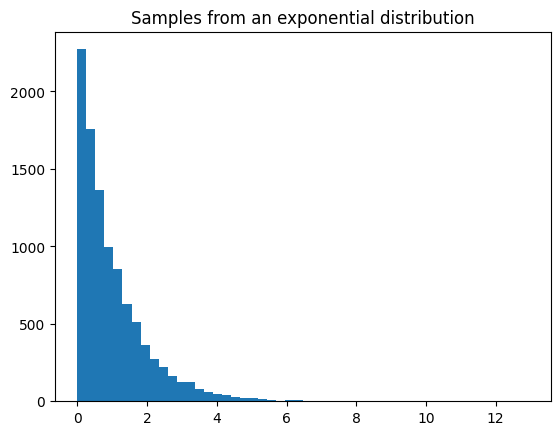

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, random
import seaborn as sns


def inverse_exp_dis(lmbda=1.0):
    return (-1 / lmbda) * log(1 - random.random())


plt.hist([inverse_exp_dis() for i in range(10_000)], 50)
plt.title("Samples from an exponential distribution")
plt.savefig("inverse_pdf_exp_distribution", format="svg")

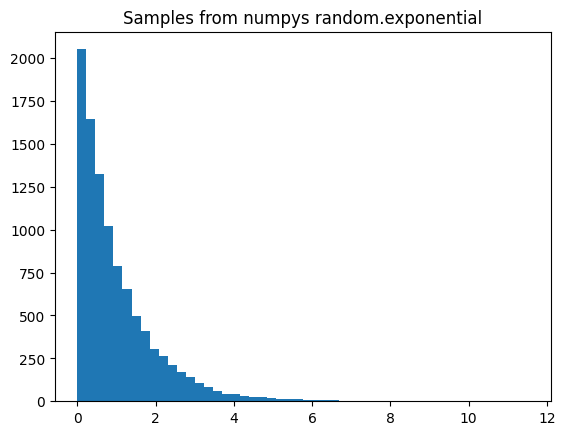

In [7]:
plt.hist([random.exponential() for i in range(10_000)], 50)
plt.title('Samples from numpys random.exponential')
plt.savefig("np_random_exp_distribution", format = "png", dpi = 300)

## Functions with no inverses

In general, there are no inverses for functions that can return the same values for different inputs. Density functions (ex. standard normal density function is symmetric, thus it returns the same value for -2 and 2, etc). An interesting example is the normal distribtuion, it is one of the examples of cumulative distribution functions that dont have a closed-form inverse. Not every cumulative distribution function has to have a closed-form inverse!! Therefore, the inverse transform method isn't efficient.

---

## Normal Distribution

There isn't any closed form expression for the inverse cdf of a normal distribution (the quantile function of a normal dist), as previously mentioned. This is often a problem with the inverse transform method. There are various ways to express the function and numerous approximations.

Thinking of a standard normal distribution, the drawback of phing inverse CDF methods are that it relies on calculation of the probit function $\Phi^{-1}$, which can't be done analytically (Note: in probability theory & statistics, the probit function is the quantile function associated with the standard normal distribution, which is commonly denoted by $N(0,1)$). Some approximate methods are described in literature. One of the easiest ways is to do a table lookup. Example: $U = 0.975$, then $Z = \Phi^{-1}(U) = 1.96$ because the z-table gives $\Phi(Z)$.

![](https://github.com/mmuratarat/mmuratarat.github.io/blob/master/_posts/images/z_table.png?raw=true)
---


If you're willing to accept numeric solution, inverse functions can be found. One of the inverse CDF of the standard normal distribution was proposed by Schmeiser:

$$
Z = \Phi^{-1}(U) \approx \frac{U^{0.135} - (1 - U)^{0.135}} {0.1975}
$$

for $0.0013499 \le U \le 0.9986501$ which matches the true normal distribution with a single digit after the decimal point.

There is one another approximation.. with an absolute error $\leq 0.45 \times 10^{−3}$:

$$
Z = sign(U − 1/2) \left(t - \frac{c_{0} + c_{1}t + c_{2} t^{2}}{1 + d_{1}t + d_{2} t^{2} + d_{3}t^{3}} \right)
$$

where sign(x) = 1, 0, −1 if $X$ is positive, zero, or negative, respectively;

$$
t = \left\{- \ln \left[min (U, 1-U) \right]^{2} \right\}^{1/2}
$$

and $c_{0} = 2.515517, c_{1} = 0.802853, c_{2} = 0.010328, d_{1} = 1.432788, d_{2} = 0.189269, d_{3} = 0.001308$.

In any case, rather than sampling x directly, simply sample $Z \sim N(0, 1)$ and transform the samples of $Z$ into samples of $X$. If $Z \sim N(0, 1)$ and you want $X \sim N(\mu, \sigma^{2})$, just take $X \leftarrow \mu + \sigma Z$. Suppose you want to generate $X \sim N(3, 16)$, and you start with $U = 0.59$. Then,

$$
X = \mu + \sigma Z = 3 + 4 \Phi^{-1}(0.59) = 3 + 4(0.2275) = 3.91
$$

because $\Phi^{-1}(0.59) = Z \rightarrow \Phi(Z) = P(Z \leq Z) = 0.59$. What is this $Z$? Using a [online calculator](https://stattrek.com/online-calculator/normal), it is $0.2275$.


mu = 2.998718649053457, std = 3.9980092901480697


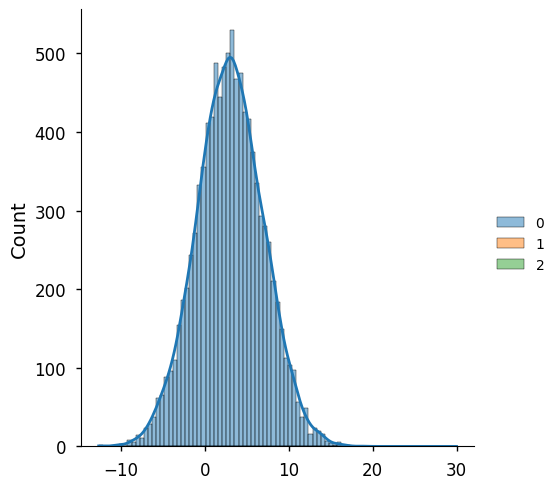

In [12]:
import numpy as np
from IID_returns_eo import univariate_normal


n = 10_000
mu = 3
variance = 16
Z = np.random.normal(loc = 0., scale = 1., size = (n, ))
X = mu + (np.sqrt(variance) * Z)

print(f"mu = {np.mean(X)}, std = {np.std(X)}")

bins = 30
sns.displot(data = (X, bins, univariate_normal(bins, mu, variance)), kde = True)
plt.plot(bins, univariate_normal(bins, mu, variance), linewidth = 2, color = 'r')
plt.show()

---
---

## <center>**Box-Muller Method**</center>

Consider a more direct & exact transformation w/ the BM Method. Let $Z_{1}$ and $Z_{2}$ be two standard normal random variables. Plotting the two as apoint in the plane, represented in a polar coordinate system as $Z_{1}$ = $B \cos\theta$ and $Z_{2}$ = $B \sin\theta$.

It's known that $B^{2}$ = $Z_{1}^{2} + Z_{2}^{2}$ has the chi-square distribution with 2 degrees of freedom, which is equivalent to an exponential distribution with mean 2. This comes from the fact that if one has k i.i.d normal random variables where $X_i$ $\sim$ $N(0, \sigma^{2})$, sum of squares of those random variables, $X_{1}^{2}$ + $X_{2}^{2}$ + ... + $X_{k}^{2}$ $\sim$ $\sigma^{2}X_{k}^{2}$:

$$Y = \lambda e^{\neg\lambda t}, t \gt 0$$
